<a href="https://colab.research.google.com/github/WesleyKhoiVo/DeepLearning/blob/main/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Load MNIST dataset
# MNIST dataset has a shape of (70000, 784) meaning there are 70,000 images with 784 dimensions (784 features).
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


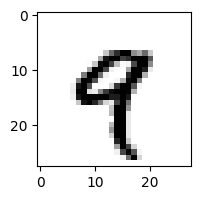

Label: 9


In [11]:
import matplotlib
import matplotlib.pyplot as plt

image = mnist.data.to_numpy()[4].reshape((28,28))
label =  mnist.target[4]

plt.figure(figsize = (15,2))
imgplot = plt.imshow(image,cmap=plt.cm.binary)
plt.show()
print("Label:",label)

In [13]:
import numpy as np
mnist.data = np.reshape(mnist.data,(-1,28,28,1))
mnist.data.shape

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
#Convert to one-hot vector
#For example, label '0' => [1,0,0,0,0,0,0,0,0,0,0], '1' => [0,1,0,0,0,0,0,0,0,0,0], ...
from tensorflow.keras.utils import to_categorical
train_lbl = to_categorical(train_lbl)
test_lbl = to_categorical(test_lbl)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import tensorflow as tf
import datetime

input_layer = Input(shape=(28,28,1))
conv_layer = Conv2D(50,(3,3),activation="relu",padding="same")(input_layer)
pooling_layer = MaxPooling2D((2,2))(conv_layer)
flatten_layer = Flatten()(pooling_layer)
dense_layer2 = Dense(10, activation="softmax")(flatten_layer)

model = Model(inputs=input_layer, outputs=dense_layer2)
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=["accuracy"])
model.summary()


log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(train_img,train_lbl,validation_data=(test_img,test_lbl), epochs= 10, batch_size=2000,callbacks=[tensorboard_callback])

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
model.save_weights("weights.h5")
model.save("model.h5",include_optimizer=False)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model


input_layer = Input(shape=(28,28,1))
conv_layer = Conv2D(50,(3,3),activation="relu",padding="same")(input_layer)
pooling_layer = MaxPooling2D((2,2))(conv_layer)
flatten_layer = Flatten()(pooling_layer)
dense_layer2 = Dense(10, activation="softmax")(flatten_layer)

saved_model = Model(inputs=input_layer, outputs=dense_layer2)

saved_model.load_weights("weights.h5")

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('model.h5')
new_model.summary()